In [13]:
import kfood_dataset


In [14]:
filepaths = kfood_dataset.get_image_paths()

tf.Tensor(150507, shape=(), dtype=int64)


In [7]:
a = [filepath.split('.')[-1] for filepath in filepaths]

In [9]:
from collections import Counter

b = Counter(a)
b.most_common()

[('jpg', 147834),
 ('JPG', 2253),
 ('png', 336),
 ('jpeg', 74),
 ('PNG', 7),
 ('JPEG', 3)]

In [12]:
import tensorflow as tf
from tqdm import tqdm
c = []
for filepath in tqdm(filepaths):
    c.append(tf.strings.lower(tf.strings.split(filepath, ".")[-1]))



  1%|          | 1594/150507 [00:08<12:41, 195.66it/s]


KeyboardInterrupt: 

In [3]:
dataset = kfood_dataset.make_kfood_dataset(filepaths, batch_size=32)

2022-01-24 23:31:34.070860: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-24 23:31:34.074024: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


tf.Tensor([[37]], shape=(1, 1), dtype=int64)
tf.Tensor([[118]], shape=(1, 1), dtype=int64)
tf.Tensor([[136]], shape=(1, 1), dtype=int64)
tf.Tensor([[24]], shape=(1, 1), dtype=int64)


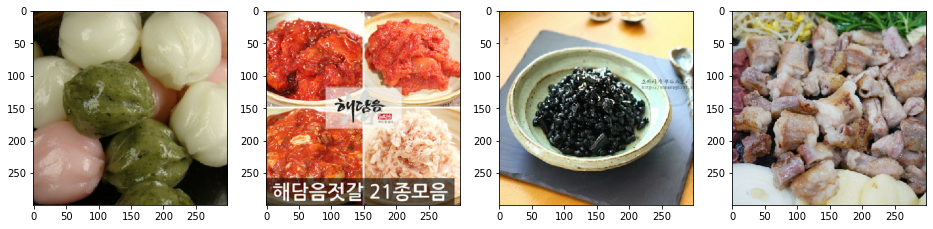

In [5]:
kfood_dataset.plot_dataset_image_4(dataset)

In [2]:
import kfood_dataset
import kfood_model

def get_dataset():
    filepaths = kfood_dataset.get_image_paths()
    dataset = kfood_dataset.make_kfood_dataset(filepaths, batch_size=32)
    return dataset


dataset = get_dataset()
inception = kfood_model.make_inception()
inception.summary()
inception.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = inception.fit(dataset, epochs=1, steps_per_epoch=100)

tf.Tensor(150507, shape=(), dtype=int64)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
stem_1 (Stem)                (None, 35, 35, 384)       604256    
_________________________________________________________________
inception_a_4 (InceptionA)   (None, 35, 35, 384)       318848    
_________________________________________________________________
inception_a_5 (InceptionA)   (None, 35, 35, 384)       318848    
_________________________________________________________________
inception_a_6 (InceptionA)   (None, 35, 35, 384)       318848    
_________________________________________________________________
inception_a_7 (InceptionA)   (None, 35, 35, 384)       318848    
_________________________________________________________________
reduction_a_1 (Red

2022-01-26 12:17:12.711800: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-26 12:17:12.716692: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2022-01-26 12:17:16.675924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 12:17:18.325527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/100 [==>...........................] - ETA: 1:29 - loss: 5.8070 - accuracy: 0.0026

2022-01-26 12:17:32.868018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 1:23 - loss: 5.9163 - accuracy: 0.0052

2022-01-26 12:17:38.981186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 1:20 - loss: 5.8720 - accuracy: 0.0045

2022-01-26 12:17:42.025663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - 111s 1s/step - loss: 5.4081 - accuracy: 0.0044
